# Лабораторная работа №2

ФИО: Михин Михаил Владимирович   
Группа: БИВТ-22-СП-3


Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [133]:
import pandas as pd
data = pd.read_csv('Admission_Predict.csv', sep=',')
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


## 2. Описание постановки задачи

На основе показателей: Serial No., GRE Score(экз), TOEFL Score(экз англ), University Rating, SOP(оценка мотивационного письма), LOR(рекомендательное письмо), CGPA(ср балл успеваемости), Research(исследовательский опыт) пытаемся спрогнозировать вероятность поступления (Chance of Admit). 

Целевая переменная - Chance of Admit, все остальные - независимые признаки. Целевая переменная количественная и принимает значения из непрерывного диапазона => регрессия


## 3. Распределение целевой переменной

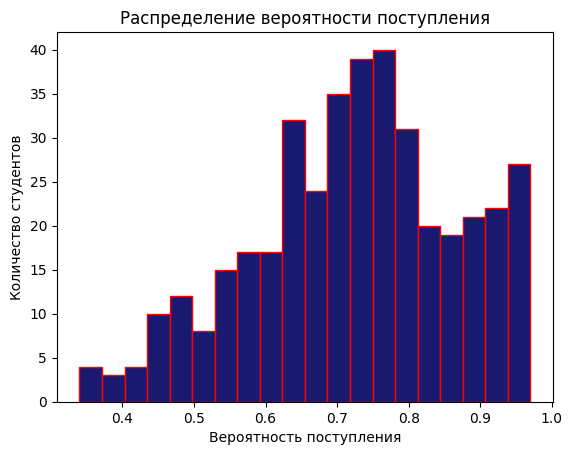

Количество уникальных значений целевой переменной: 60


In [134]:
import matplotlib.pyplot as plt

plt.hist(data['Chance of Admit '], color = 'midnightblue', bins = 20, edgecolor = 'red')
plt.title('Распределение вероятности поступления')
plt.xlabel('Вероятность поступления')
plt.ylabel('Количество студентов')
plt.show()

print("Количество уникальных значений целевой переменной:", len(data['Chance of Admit '].unique()))

Можно сделать вывод о том, что практически все значения целевой переменной уникальны.Правая ассиметия т.к.большинство значений ближе к верхней границе, есть хвост в левую сторону, то есть меньшее количество студентов с низкой вероятностью поступления.

Присутствует значительное смещение в сторону высоких значений вероятности поступления => несбалансированность. Неоднородная выборка т.к. распределение концентрируется в опр. интервалах и отклоняется от нормального

## 4. Выведите основные статистики по переменным в датасете 

In [135]:
print(data.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.34000

## 5. Выведите основную информацию по датасету 

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


## 6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. 

In [137]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## 7. Постройте гистограммы 5 любых признаков 

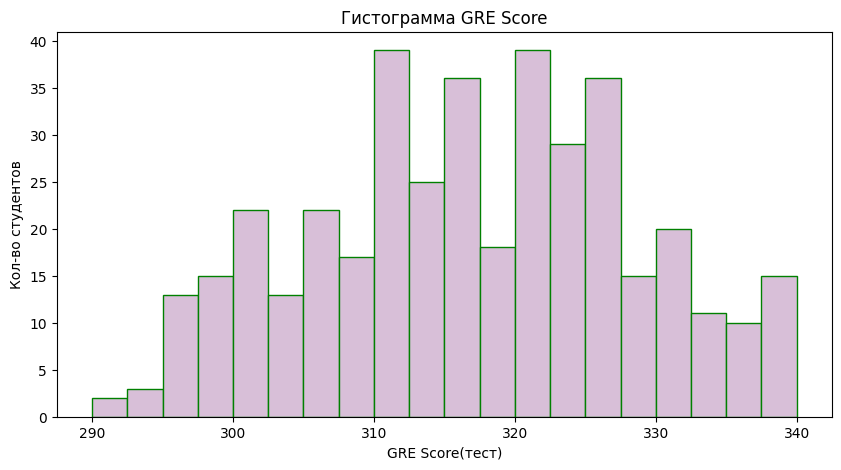

In [138]:
plt.figure(figsize = (10, 5))
plt.hist(data['GRE Score'], bins = 20, color = 'thistle', edgecolor = 'green')

plt.title('Гистограмма GRE Score')
plt.xlabel('GRE Score(тест)')
plt.ylabel('Кол-во студентов')


plt.show()

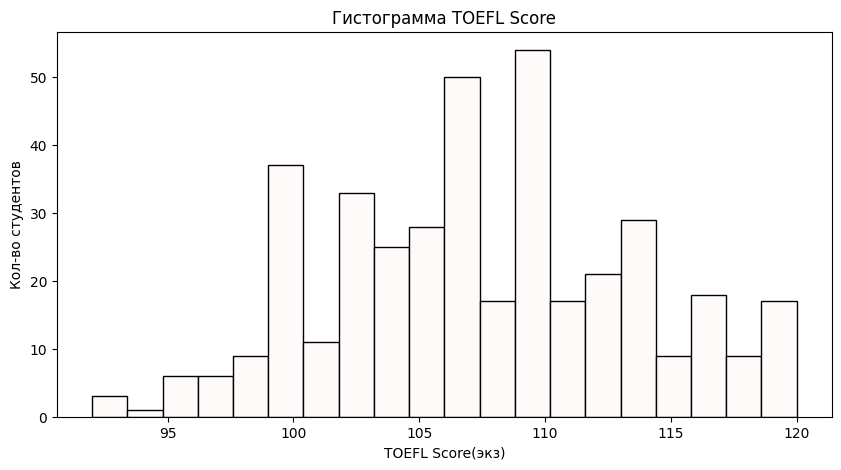

In [139]:
plt.figure(figsize = (10, 5))
plt.hist(data['TOEFL Score'], bins = 20, color = 'snow', edgecolor = 'black')

plt.title('Гистограмма TOEFL Score')
plt.xlabel('TOEFL Score(экз)')
plt.ylabel('Кол-во студентов')

plt.show()

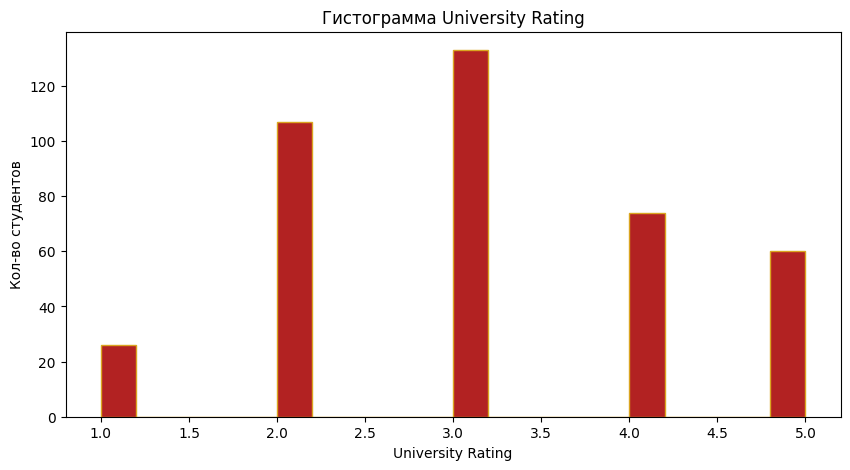

In [140]:
plt.figure(figsize = (10, 5))
plt.hist(data['University Rating'], bins = 20, color = 'firebrick', edgecolor = 'goldenrod')

plt.title('Гистограмма University Rating')
plt.xlabel('University Rating')
plt.ylabel('Кол-во студентов')

plt.show()

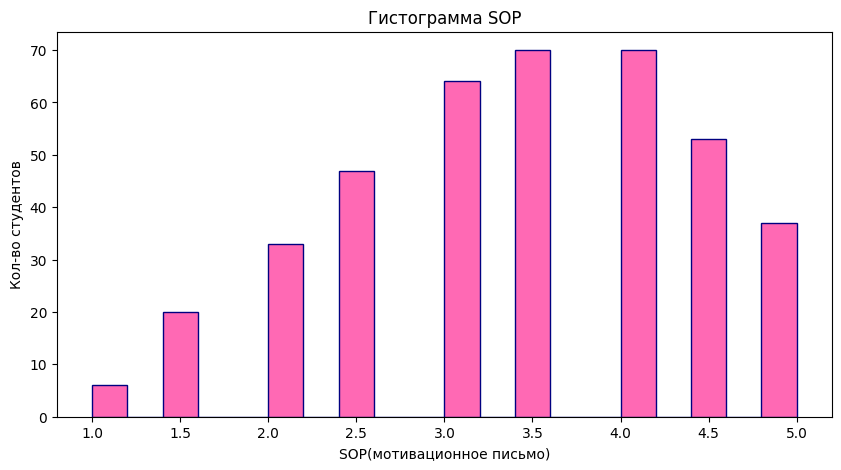

In [141]:
plt.figure(figsize = (10, 5))
plt.hist(data['SOP'], bins = 20, color = 'hotpink', edgecolor = 'navy')

plt.title('Гистограмма SOP')
plt.xlabel('SOP(мотивационное письмо)')
plt.ylabel('Кол-во студентов')

plt.show()

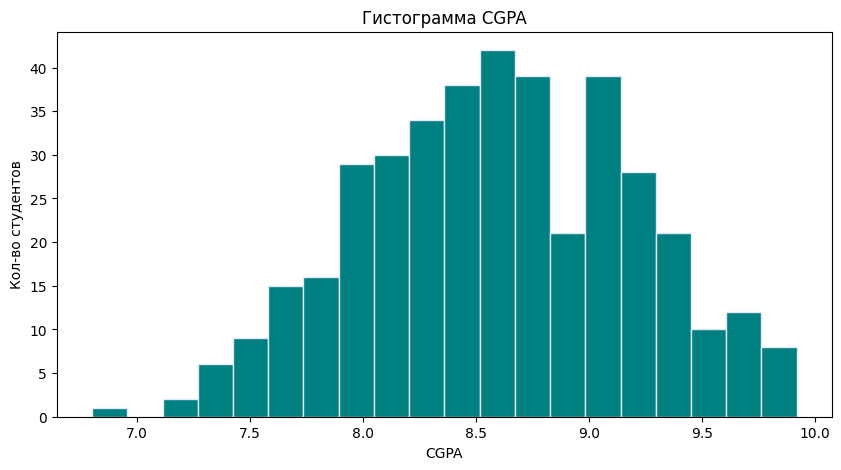

In [142]:
plt.figure(figsize = (10, 5))
plt.hist(data['CGPA'], bins = 20, color = 'teal', edgecolor = 'lavender')

plt.title('Гистограмма CGPA')
plt.xlabel('CGPA')
plt.ylabel('Кол-во студентов')

plt.show()

## Анализ гистограмм признаков
GRE Score:
Почти симметричное распределение, близкое к нормальному. Большинство значений лежит в районе 310-330 => высокая концентрация кандидатов с баллами выше среднего. Смещение в данных нет.

TOEFL Score:
Распределение близкое к нормальному, пик наблюдается в диапазоне 100-110 баллов. Наблюдается небольшая правосторонняя асимметрия, т.к. кандидаты с очень высокими баллами встречаются чуть реже.

University Rating:
Ступенчатое распределение: Наибольшее количество кандидатов обучаются в университетах среднего уровня (рейт 3). Распределение смещено вправо, т.к. кандидатов из университетов с низкими рейтингами меньше.

SOP:
Распределение относительно равномерное, чуть юольше высоких оценок.

CGPA:
Правостороннее смещение: большинство кандидатов имеют высокий средний балл 8-10 => в выборке больше сильных студентов.

## 8. Постройте графики зависимости 5 любых переменных от целевой переменной 

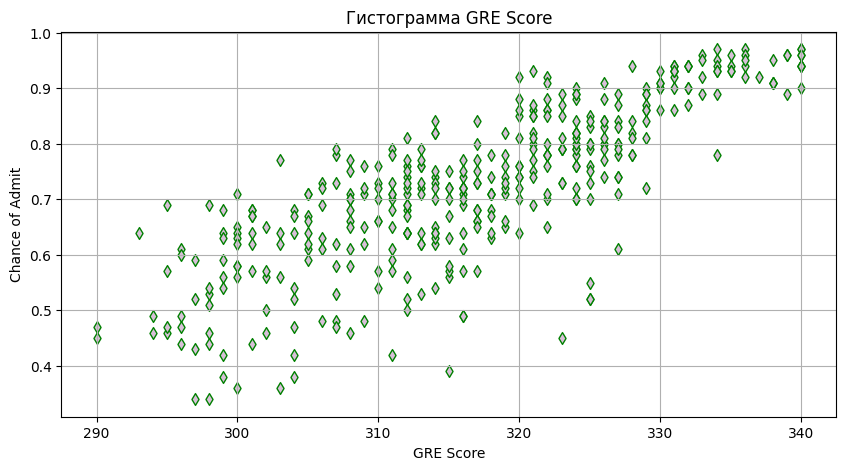

In [143]:
plt.figure(figsize =(10, 5))
plt.scatter(data['GRE Score'], data['Chance of Admit '], color = 'thistle', edgecolor = 'green', marker = 'd')

plt.title('Гистограмма GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.grid()

plt.show()

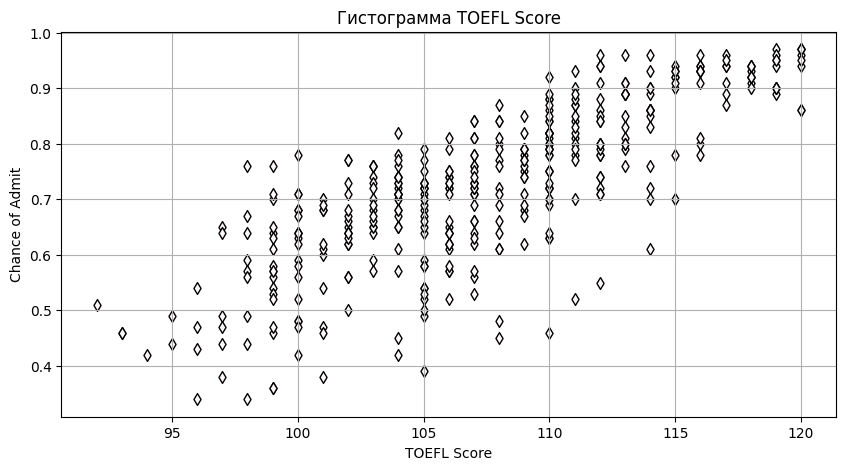

In [144]:
plt.figure(figsize =(10, 5))
plt.scatter(data['TOEFL Score'], data['Chance of Admit '], color = 'snow', edgecolor = 'black', marker = 'd')

plt.title('Гистограмма TOEFL Score')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.grid()

plt.show()

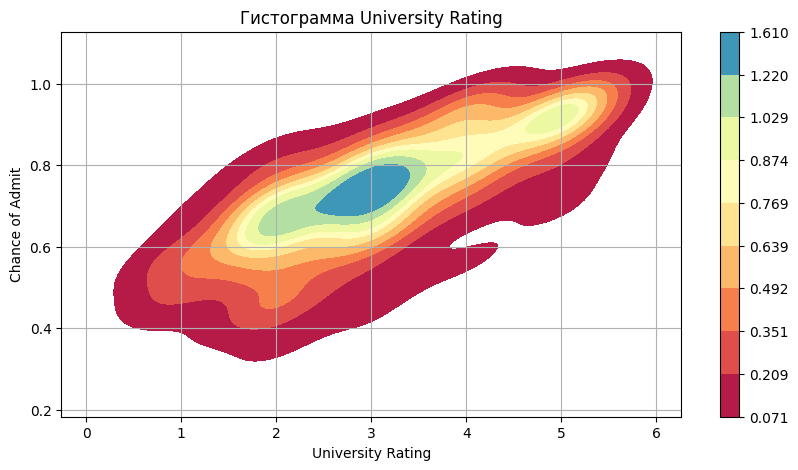

In [145]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.kdeplot(data = data, x = 'University Rating', y = 'Chance of Admit ', cmap = 'Spectral', cbar=True, fill=True)
plt.title('Гистограмма University Rating')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')

plt.grid()
plt.show()


/var/folders/dd/vym6ybp12vl8s23nzh2lwlxw0000gn/T/ipykernel_80480/844138022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = data['SOP'], y = data['Chance of Admit '], palette = 'YlOrBr')


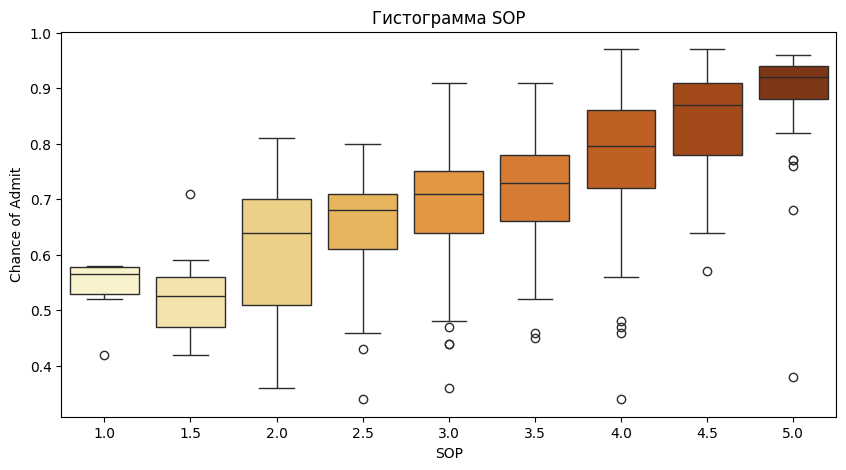

In [146]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = data['SOP'], y = data['Chance of Admit '], palette = 'YlOrBr')
plt.title('Гистограмма SOP')
plt.xlabel('SOP')
plt.ylabel('Chance of Admit')

plt.show()

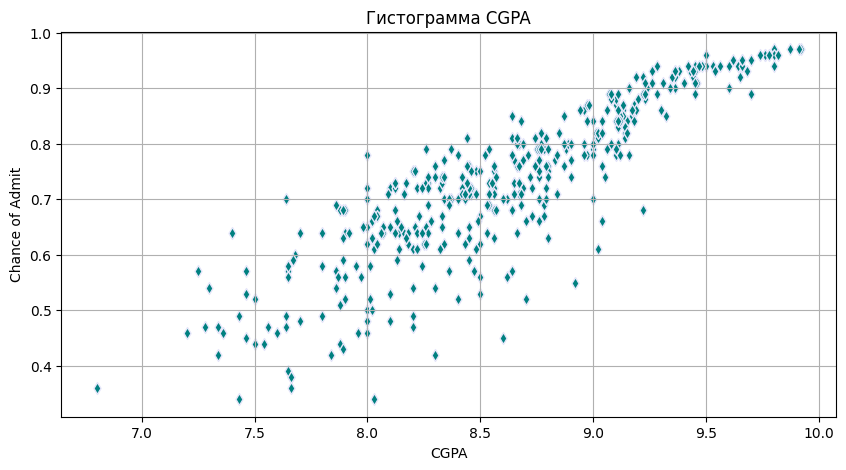

In [147]:
plt.figure(figsize =(10, 5))
plt.scatter(data['CGPA'], data['Chance of Admit '], color = 'teal', edgecolor = 'lavender', marker = 'd')

plt.title('Гистограмма CGPA')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.grid()

plt.show()

## Анализ зависимости переменных от целевой переменной

GRE Score:
С увеличением баллов GRE вероятность поступления возрастает. Выраженная линейная зависимость - чем выше результат экзамена, тем больше шансов на поступление.

TOEFL Score:
Кандидаты с высокими баллами TOEFL имеют более высокие шансы поступления. Почти линейная связь

University Rating:
Вероятность поступления сильно зависит от рейтинга университета. Ступенчатая зависимость( резкий скачок вероятности наблюдается при увеличении рейтинга).

SOP:
Более высокая оценка SOP коррелирует с повышенными шансами поступления, но зависимость не столько линейная, как у других переменных.

CGPA:
График демонстрирует ярко выраженную положительную связь. После определённого порога, начиная с 9, вероятность поступления практически достигает максимального значения.
